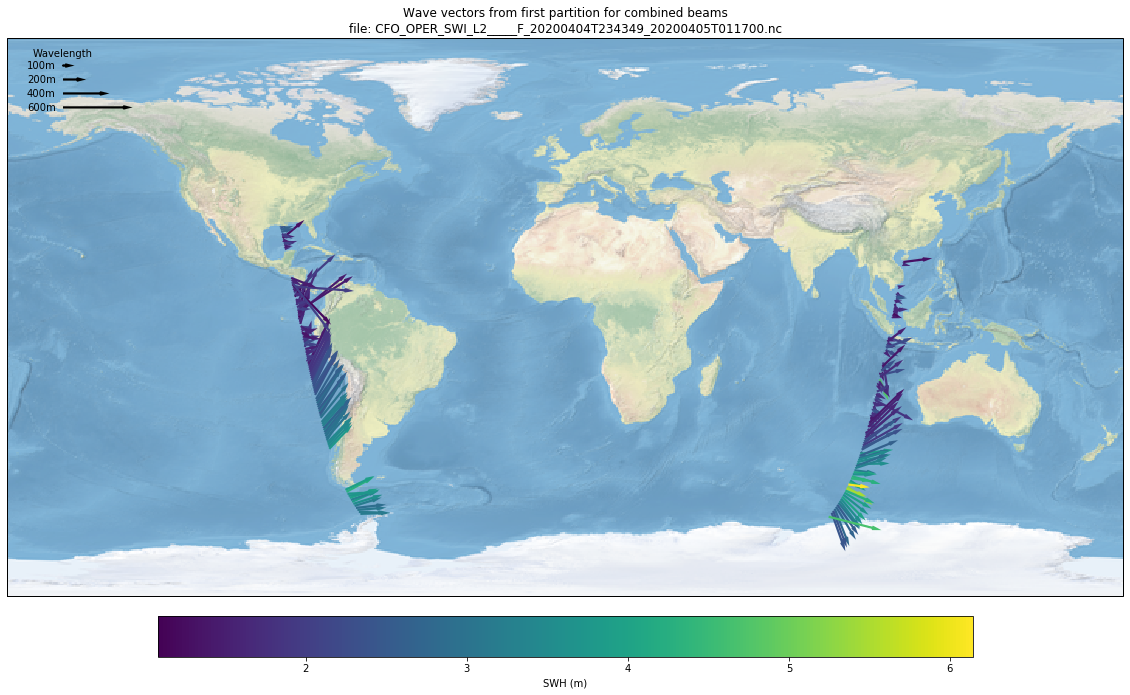

In [1]:
#SWIM wave parameters visualization
#:author: C. Tourain
#:creation date : 08-11-2019

#This program is free software: you can redistribute it and/or modify it
#under the terms of the GNU Lesser General Public License as published by
#the Free Software Foundation, either version 3 of the License,
#or (at your option) any later version.

#This program is distributed in the hope that it will be useful,
#but WITHOUT ANY WARRANTY; without even the implied warranty of
#MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU Lesser
#General Public License for more details (http://www.gnu.org/licenses/).
#"""

########## warning : needs python with cartopy package  ##################
from math import pi
import numpy as np
import netCDF4 as netcdf
from matplotlib import pyplot as plt
from matplotlib import cm, colors
import cartopy.crs as ccrs
%matplotlib inline

############################################################# arguments initilization :##########################################################
#SWIM L2 NetCDF file full path
SWIM_L2_NC_file_path='/home/qt/tourainc/pour_hand_book/'
#SWIM L2 NetCDF file full name
SWIM_L2_NC_file_name='CFO_OPER_SWI_L2_____F_20200404T234349_20200405T011700.nc'

#side of the nadir track to analyse (0 : right sides ; 1 :left side; 2: both)
nadir_side=0

#beam choice for spectra : 6=> beam 6°; 8=> beam 8°; 10=> beam 10° ; 0 => combined (combination of the 3 beams)
beam=0

#wave parameters origin : whole spectrum wave paramters: 0 ; partitions wave parameters : 1
spectrum=1

#partition for visualization : 0: all partitions ; 1 : first partition; 2 : second partition ; 3 :third partition
num_part=1
part_title=['all partitions','first partition','second partition','third partition']

############################################################## wave parameters visualization ######################################################
#NetCDF file opening and reading
cdf=netcdf.Dataset(SWIM_L2_NC_file_path+SWIM_L2_NC_file_name)
lat = cdf.variables['lat_l2'][nadir_side,:]
lon = cdf.variables['lon_l2'][nadir_side,:]

# wave parameters initialization in the case of whole spectrum wave parameters selected
if spectrum==0:
    # for combination of the 3 beams
    if beam==0 :
        swh_part = cdf.variables['wave_param_combined'][0,nadir_side,:]
        dom_wl = cdf.variables['wave_param_combined'][1,nadir_side,:]
        dom_azi = cdf.variables['wave_param_combined'][2,nadir_side,:]
    # for one selected beam
    else:
        swh_part = cdf.variables['wave_param'][0,nadir_side,:,int((beam-6)/2)]
        dom_wl = cdf.variables['wave_param'][1,nadir_side,:,int((beam-6)/2)]
        dom_azi = cdf.variables['wave_param'][2,nadir_side,:,int((beam-6)/2)]

# wave parameters initialization in the case of partition wave parameters selected
else :
    # for all partitions
    if num_part==0:
        # for combination of the 3 beams
        if beam==0:
            swh_part = cdf.variables['wave_param_part_combined'][0,:,nadir_side,:]
            dom_wl = cdf.variables['wave_param_part_combined'][1,:,nadir_side,:]
            dom_azi = cdf.variables['wave_param_part_combined'][2,:,nadir_side,:]
        # for one beam
        else :
            swh_part = cdf.variables['wave_param_part'][0,:,nadir_side,:,int((beam-6)/2)]
            dom_wl = cdf.variables['wave_param_part'][1,:,nadir_side,:,int((beam-6)/2)]
            dom_azi = cdf.variables['wave_param_part'][2,:,nadir_side,:,int((beam-6)/2)]
    # for one selected partition
    else:
        # for combination of the 3 beams
        if beam==0:
            swh_part = cdf.variables['wave_param_part_combined'][0,num_part-1,nadir_side,:]
            dom_wl = cdf.variables['wave_param_part_combined'][1,num_part-1,nadir_side,:]
            dom_azi = cdf.variables['wave_param_part_combined'][2,num_part-1,nadir_side,:]
        # for one selected beam
        else :
            swh_part = cdf.variables['wave_param_part'][0,num_part-1,nadir_side,:,int((beam-6)/2)]
            dom_wl = cdf.variables['wave_param_part'][1,num_part-1,nadir_side,:,int((beam-6)/2)]
            dom_azi = cdf.variables['wave_param_part'][2,num_part-1,nadir_side,:,int((beam-6)/2)]

#wave vectors construction
U_part=np.sin(dom_azi*np.pi/180.)*(dom_wl)
V_part=np.cos(dom_azi*np.pi/180.)*(dom_wl)
C_part=swh_part

# wavec vectors visualisation
cmap = cm.jet
plt.figure(figsize=[20,15])
ax = plt.axes(projection=ccrs.PlateCarree())  
ax.stock_img()
ax.set_global() 
if num_part==0 and spectrum==1:
    map=plt.quiver(lon,lat,U_part[0,:],V_part[0,:],C_part[0,:],width=0.002,headwidth=2,headlength=4)
    map=plt.quiver(lon,lat,U_part[1,:],V_part[1,:],C_part[1,:],width=0.002,headwidth=2,headlength=4)
    map=plt.quiver(lon,lat,U_part[2,:],V_part[2,:],C_part[2,:],width=0.002,headwidth=2,headlength=4)
else:
    map=plt.quiver(lon,lat,U_part,V_part,C_part,width=0.002,headwidth=2,headlength=4)
plt.quiverkey(map,0.05,0.95,0,'Wavelength',labelpos='N')
plt.quiverkey(map,0.05,0.95,100,'100m',labelpos='W')
plt.quiverkey(map,0.05,0.925,200,'200m',labelpos='W')
plt.quiverkey(map,0.05,0.900,400,'400m',labelpos='W')
plt.quiverkey(map,0.05,0.875,600,'600m',labelpos='W')
cbar1 = plt.colorbar(map, cmap=cmap, orientation='horizontal', extend='neither',fraction=0.05 ,pad=0.025)
cbar1.set_label('SWH (m)')
if beam==0:
    beam_title='combined beams'
else :
    beam_title=str(beam)+'° beam'
if spectrum==0:
    plt.title('Wave vectors from the whole spectrum for ' + str(beam_title)+'\n' +'file: '+str(SWIM_L2_NC_file_name))
else:
    plt.title('Wave vectors from '+ str(part_title[num_part])+' for ' + str(beam_title)+'\n'+'file: '+str(SWIM_L2_NC_file_name))
